# Analyzing Drug200 Dataset

### About Dataset
Since as a beginner in machine learning it would be a great opportunity to try some techniques to predict the outcome of the drugs that might be accurate for the patient.

### Content
The target feature is:
Drug type

The feature sets are:
Age,
Sex,
Blood Pressure Levels (BP),
Cholesterol Levels,
Na to Potassium Ration

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Reading the dataset
df=pd.read_csv("C:\\Users\\SHAIFALI PATWAL\\Downloads\\Shaifali Documents\\Python projects\\drug200.csv")

In [24]:
# Checking the first five rows of the dataset
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [25]:
#Checking the number of rows and columns
df.shape

(200, 6)

# ETL (Extract, Transform and Load)
ETL involves extracting the data from a source, transforming it into a suitable format, and loading it into a data structure for analysis.

### Extract
Data is already extracted by loading the CSV file.
### Transform
Handle missing values, convert data types, and remove duplicates.

In [26]:
# Checking the missing values in the dataset
df.isnull().sum()

# Here we can see there is no null values in the dataset

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [43]:
df.isna()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
195,False,False,False,False,False,False
196,False,False,False,False,False,False
197,False,False,False,False,False,False
198,False,False,False,False,False,False


In [27]:
df.drop_duplicates()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [29]:
df['Sex'].nunique()

2

## EDA

In [30]:
#Summary Statistics
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


C:\Users\SHAIFALI PATWAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


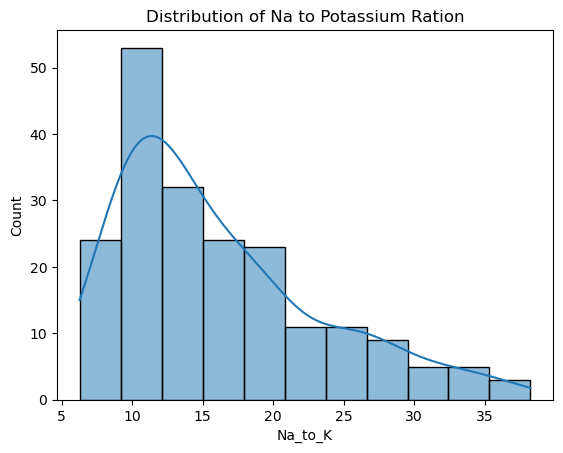

In [31]:
sns.histplot(df['Na_to_K'],kde=True)
plt.title("Distribution of Na to Potassium Ration")
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

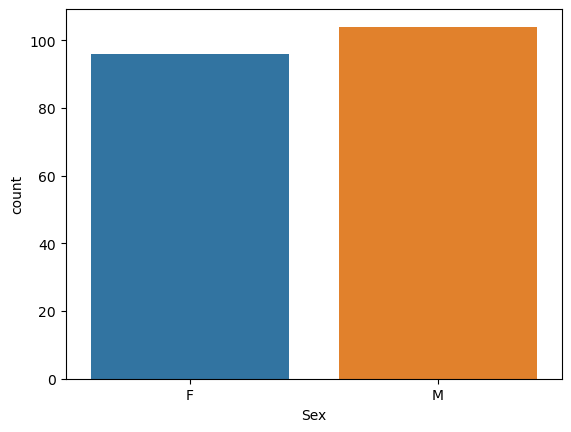

In [32]:
sns.countplot(data=df, x='Sex')

In [33]:
df['Sex'].value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [34]:
df.groupby('Sex')['Na_to_K'].mean()


Sex
F    17.022063
M    15.219029
Name: Na_to_K, dtype: float64

<Axes: xlabel='BP'>

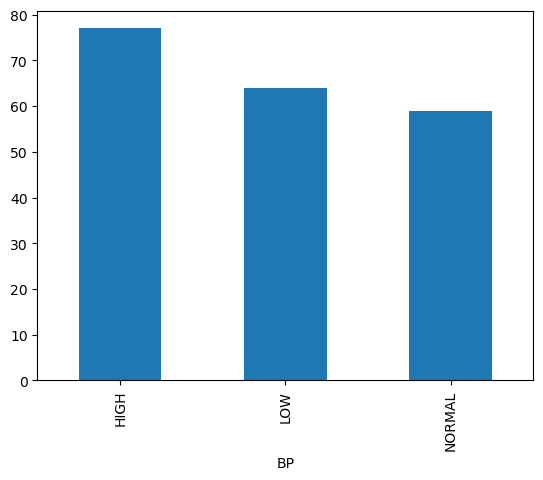

In [35]:
df['BP'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

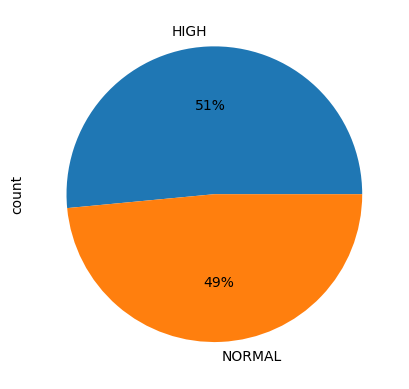

In [36]:
df['Cholesterol'].value_counts().plot(kind="pie", autopct = '%0.0f%%')

In [37]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

<Axes: ylabel='count'>

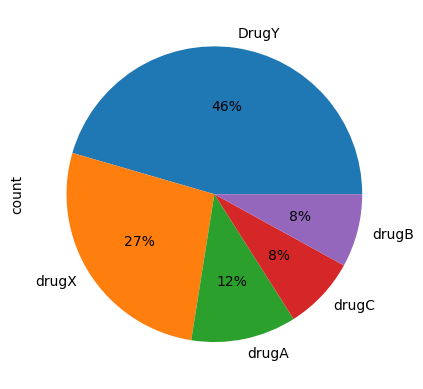

In [38]:
df['Drug'].value_counts().plot(kind="pie", autopct = '%0.0f%%')

In [39]:
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [45]:
df.Age.value_counts().sort_values(ascending=False)

Age
47    8
28    7
49    7
23    7
39    6
32    6
58    5
60    5
22    5
37    5
50    5
61    4
57    4
43    4
31    4
41    4
45    4
36    4
20    4
56    4
65    4
68    4
74    4
24    4
26    4
42    4
51    4
72    4
34    4
67    4
38    3
64    3
35    3
69    3
15    3
18    3
16    3
70    3
40    3
53    3
59    3
29    2
48    2
46    2
73    2
66    2
19    2
62    2
55    2
52    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: count, dtype: int64

In [52]:
# Creating a frequency table
pd.crosstab(df['Sex'],df["BP"])

BP,HIGH,LOW,NORMAL
Sex,,,
F,38,28,30
M,39,36,29


In [51]:
pd.crosstab(df.Sex, df.Cholesterol)

Cholesterol,HIGH,NORMAL
Sex,,
F,49,47
M,54,50


In [53]:
pd.crosstab(df['Sex'],df['Drug'])

Drug,DrugY,drugA,drugB,drugC,drugX
Sex,,,,,
F,47,9,6,7,27
M,44,14,10,9,27


In [58]:
# Defining the age bins and labels
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

# Categorizing ages into bins
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Group and count for males
Male = df[df['Sex'] == 'M'].groupby('AgeGroup')['Age'].count()

# Group and count for females
Female = df[df['Sex'] == 'F'].groupby('AgeGroup')['Age'].count()



C:\Users\SHAIFALI PATWAL\AppData\Local\Temp\ipykernel_22412\458481284.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Male = df[df['Sex'] == 'M'].groupby('AgeGroup')['Age'].count()
C:\Users\SHAIFALI PATWAL\AppData\Local\Temp\ipykernel_22412\458481284.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Female = df[df['Sex'] == 'F'].groupby('AgeGroup')['Age'].count()


In [59]:
print(Male)


AgeGroup
10-20     6
20-30    15
30-40    17
40-50    25
50-60    17
60-70    18
70-80     6
Name: Age, dtype: int64


In [60]:
print(Female)

AgeGroup
10-20    10
20-30    17
30-40    22
40-50    15
50-60    16
60-70    12
70-80     4
Name: Age, dtype: int64
